In [2]:
#Import Standard Packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import sqlite3 
from zipfile import ZipFile 

In [3]:
with ZipFile(r"/Users/lucaswilkerson/Desktop/Phase1_project/dsc-phase-1-project-v2-4/zippedData/im.db.zip", 'r') as zfiles:
   zfiles.printdir()
   zfiles.extractall()

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328


In [5]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_df = pd.read_sql(
    """
SELECT *
FROM movie_akas
""",
    conn,
)
imdb_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [7]:
#reading in Box office mojo and The numbers dataset 
tn_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
bom_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [8]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
#had to change data type of domestic_gross to float
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$', '')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].astype(float)

In [10]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
tn_sorted = tn_budgets.sort_values("domestic_gross", ascending = False)
bom_sorted= bom_gross.sort_values("domestic_gross", ascending = False)

In [16]:
tn_sorted.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225.0,"$2,053,311,220"
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,"$2,776,345,279"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566.0,"$1,348,258,224"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482.0,"$2,048,134,200"
42,43,"Dec 19, 1997",Titanic,"$200,000,000",659363944.0,"$2,208,208,395"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000",652270625.0,"$1,648,854,864"
26,27,"May 4, 2012",The Avengers,"$225,000,000",623279547.0,"$1,517,935,897"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747"
43,44,"Jun 15, 2018",Incredibles 2,"$200,000,000",608581744.0,"$1,242,520,711"
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000",533720947.0,"$1,001,996,207"


In [17]:
bom_sorted.head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [25]:
bom_sorted_movie= bom_sorted.rename(columns= {"title": "movie", "domestic_gross":"bom_domestic_gross"})

In [20]:
tn_sorted.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225.0,"$2,053,311,220"
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,"$2,776,345,279"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566.0,"$1,348,258,224"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482.0,"$2,048,134,200"
42,43,"Dec 19, 1997",Titanic,"$200,000,000",659363944.0,"$2,208,208,395"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000",652270625.0,"$1,648,854,864"
26,27,"May 4, 2012",The Avengers,"$225,000,000",623279547.0,"$1,517,935,897"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747"
43,44,"Jun 15, 2018",Incredibles 2,"$200,000,000",608581744.0,"$1,242,520,711"
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000",533720947.0,"$1,001,996,207"


In [26]:
tn_bom_movies = pd.merge(tn_sorted, bom_sorted_movie, how = "left", on= ["movie"])

In [27]:
tn_bom_movies.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,bom_domestic_gross,foreign_gross,year
0,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225.0,"$2,053,311,220",NaN,NaN,NaN,NaN
1,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,"$2,776,345,279",NaN,NaN,NaN,NaN
2,42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566.0,"$1,348,258,224",BV,700100000.0,646900000,2018.0
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482.0,"$2,048,134,200",BV,678800000.0,"1,369.5",2018.0
4,43,"Dec 19, 1997",Titanic,"$200,000,000",659363944.0,"$2,208,208,395",NaN,NaN,NaN,NaN
5,34,"Jun 12, 2015",Jurassic World,"$215,000,000",652270625.0,"$1,648,854,864",Uni.,652300000.0,"1,019.4",2015.0
6,27,"May 4, 2012",The Avengers,"$225,000,000",623279547.0,"$1,517,935,897",NaN,NaN,NaN,NaN
7,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747",NaN,NaN,NaN,NaN
8,44,"Jun 15, 2018",Incredibles 2,"$200,000,000",608581744.0,"$1,242,520,711",BV,608600000.0,634200000,2018.0
9,75,"Jul 18, 2008",The Dark Knight,"$185,000,000",533720947.0,"$1,001,996,207",NaN,NaN,NaN,NaN


In [29]:
#combined the numbers data and box office mojo
tn_bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5782 non-null   int64  
 1   release_date        5782 non-null   object 
 2   movie               5782 non-null   object 
 3   production_budget   5782 non-null   object 
 4   domestic_gross      5782 non-null   float64
 5   worldwide_gross     5782 non-null   object 
 6   studio              1246 non-null   object 
 7   bom_domestic_gross  1245 non-null   float64
 8   foreign_gross       1086 non-null   object 
 9   year                1247 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 496.9+ KB


In [30]:
tn_bom_movies.value_counts()

id   release_date  movie                      production_budget  domestic_gross  worldwide_gross  studio  bom_domestic_gross  foreign_gross  year  
100  Sep 18, 2015  Sicario                    $30,000,000        46889293.0      $84,393,749      LGF     46900000.0          38000000       2015.0    1
35   Jun 28, 2013  The Heat                   $43,000,000        159581587.0     $229,727,774     Fox     159600000.0         70300000       2013.0    1
36   Jul 17, 2015  Trainwreck                 $35,000,000        110212700.0     $141,123,897     Uni.    110200000.0         30600000       2015.0    1
     Jan 29, 2016  The Finest Hours           $70,000,000        27569558.0      $49,252,761      BV      27600000.0          24500000       2016.0    1
     Jan 15, 2010  Fish Tank                  $3,000,000         374675.0        $5,922,292       IFC     375000.0            2000000        2010.0    1
                                                                                       

In [33]:
tn_bom_movies['worldwide_gross'] = tn_bom_movies['worldwide_gross'].str.replace(',', '')
tn_bom_movies['worldwide_gross'] = tn_bom_movies['worldwide_gross'].str.replace('$', '')
tn_bom_movies['worldwide_gross'] = tn_bom_movies['worldwide_gross'].astype(float)

tn_bom_movies['production_budget'] = tn_bom_movies['production_budget'].str.replace(',', '')
tn_bom_movies['production_budget'] = tn_bom_movies['production_budget'].str.replace('$', '')
tn_bom_movies['production_budget'] = tn_bom_movies['production_budget'].astype(float)

In [39]:
# dropping rows with 0 values for budget and gross columns
tn_bom_cleaned = tn_bom_movies.loc[(tn_budgets.domestic_gross != 0) 
                                       &(tn_bom_movies.worldwide_gross != 0) 
                                       &(tn_bom_movies.production_budget != 0)]
tn_bom_cleaned.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,studio,bom_domestic_gross,foreign_gross,year
0,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN
1,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN,NaN
2,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,BV,700100000.0,646900000,2018.0
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,678800000.0,"1,369.5",2018.0
4,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,NaN,NaN,NaN,NaN


In [40]:
tn_bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 5779
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4972 non-null   int64  
 1   release_date        4972 non-null   object 
 2   movie               4972 non-null   object 
 3   production_budget   4972 non-null   float64
 4   domestic_gross      4972 non-null   float64
 5   worldwide_gross     4972 non-null   float64
 6   studio              1167 non-null   object 
 7   bom_domestic_gross  1167 non-null   float64
 8   foreign_gross       1027 non-null   object 
 9   year                1167 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 427.3+ KB


In [41]:
tn_bom_cleaned.set_index('id', inplace = True)
tn_bom_movies= (tn_bom_cleaned.drop('release_date', axis = 1))

tn_bom_movies.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,studio,bom_domestic_gross,foreign_gross,year
id,,,,,,,,
6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN
1,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN,NaN
42,Black Panther,200000000.0,700059566.0,1.348258e+09,BV,700100000.0,646900000,2018.0
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,678800000.0,"1,369.5",2018.0
43,Titanic,200000000.0,659363944.0,2.208208e+09,NaN,NaN,NaN,NaN
34,Jurassic World,215000000.0,652270625.0,1.648855e+09,Uni.,652300000.0,"1,019.4",2015.0
27,The Avengers,225000000.0,623279547.0,1.517936e+09,NaN,NaN,NaN,NaN
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN
44,Incredibles 2,200000000.0,608581744.0,1.242521e+09,BV,608600000.0,634200000,2018.0


In [45]:
#Making a new column for Net gross earning (worldwide gross- production budget)
tn_bom_movies['Net_Gross']= tn_bom_movies['worldwide_gross'] - tn_bom_movies['production_budget']
top_gross_movies= tn_bom_movies.sort_values("Net_Gross", ascending = False)
top_gross_movies.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,studio,bom_domestic_gross,foreign_gross,year,Net_Gross
id,,,,,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN,NaN,2.351345e+09
43,Titanic,200000000.0,659363944.0,2.208208e+09,NaN,NaN,NaN,NaN,2.008208e+09
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,678800000.0,"1,369.5",2018.0,1.748134e+09
6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN,1.747311e+09
34,Jurassic World,215000000.0,652270625.0,1.648855e+09,Uni.,652300000.0,"1,019.4",2015.0,1.433855e+09
67,Furious 7,190000000.0,353007020.0,1.518723e+09,Uni.,353000000.0,"1,163.0",2015.0,1.328723e+09
27,The Avengers,225000000.0,623279547.0,1.517936e+09,NaN,NaN,NaN,NaN,1.292936e+09
61,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,NaN,NaN,NaN,NaN,1.216693e+09
42,Black Panther,200000000.0,700059566.0,1.348258e+09,BV,700100000.0,646900000,2018.0,1.148258e+09


In [46]:
top_gross_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 1 to 3
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie               4972 non-null   object 
 1   production_budget   4972 non-null   float64
 2   domestic_gross      4972 non-null   float64
 3   worldwide_gross     4972 non-null   float64
 4   studio              1167 non-null   object 
 5   bom_domestic_gross  1167 non-null   float64
 6   foreign_gross       1027 non-null   object 
 7   year                1167 non-null   float64
 8   Net_Gross           4972 non-null   float64
dtypes: float64(6), object(3)
memory usage: 388.4+ KB


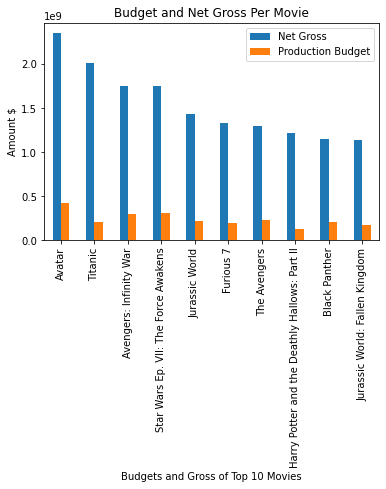

In [47]:
top10_movies_gross = top_gross_movies.head(10)
top10_movies_gross.plot(
    x="movie", y=["Net_Gross", "production_budget"], kind="bar"
)
plt.xlabel("Budgets and Gross of Top 10 Movies")
plt.ylabel("Amount $")
plt.legend(["Net Gross", "Production Budget"])
plt.title("Budget and Net Gross Per Movie")
plt.show()

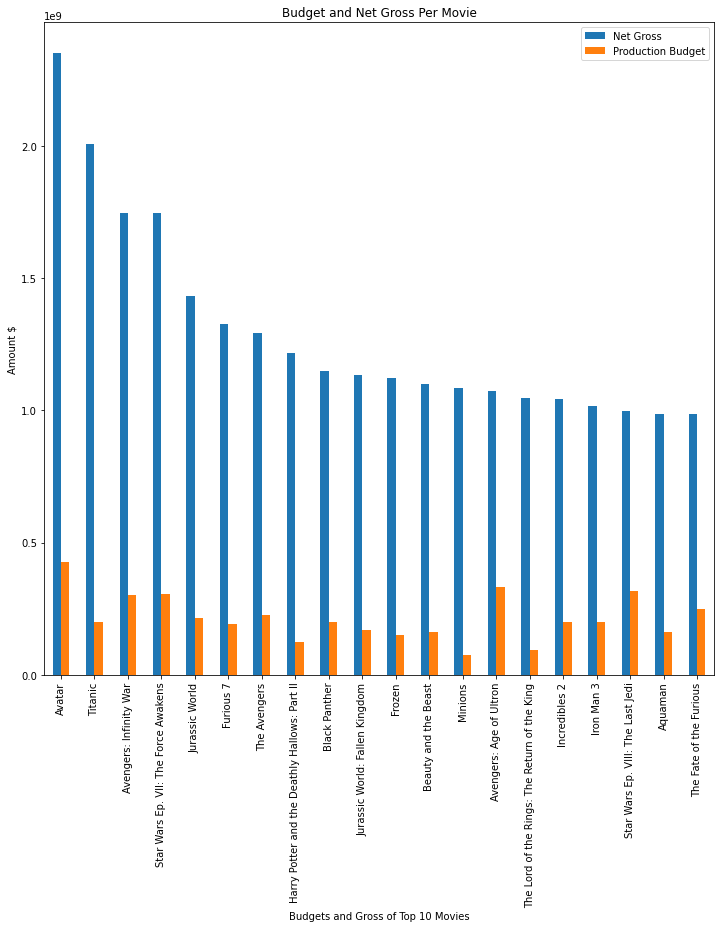

In [53]:
top20_movies_gross = top_gross_movies.head(20)
top20_movies_gross.plot(
    x="movie", y=["Net_Gross", "production_budget"], kind="bar", figsize = (12,12))
plt.xlabel("Budgets and Gross of Top 10 Movies")
plt.ylabel("Amount $")
plt.legend(["Net Gross", "Production Budget"])
plt.title("Budget and Net Gross Per Movie")
plt.show()

In [48]:
#checking correlation between movie budget and net gross
top_gross_movies["production_budget"].corr(top_gross_movies["Net_Gross"])

0.6064991960944546

In [54]:
top20_movies_gross["production_budget"].corr(top20_movies_gross["Net_Gross"])

0.5552068913047246

In [49]:
top100_gross_movies= top_gross_movies.head(100)

In [50]:
#checking correlation value when looking at the top 100 movies
top100_gross_movies["production_budget"].corr(top100_gross_movies["Net_Gross"])


0.3797822303349259

Looking at the data and correlations it seems that production budget does have a positive association with overall net gross earnings. Interesting enough, when you only include a subset of the top 100 that correlation seems to be weaker but when all data is included, the correlation is stronger. 

In [55]:
#getting statistic calculations
top_gross_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
production_budget,4972.0,3.493986e+07,4.349782e+07,5000.0,7000000.00,20000000.0,4.500000e+07,4.250000e+08
domestic_gross,4972.0,4.782539e+07,7.153927e+07,0.0,4712207.75,23411833.0,5.985145e+07,9.366622e+08
worldwide_gross,4972.0,1.042457e+08,1.843949e+08,176.0,9311768.00,38070297.5,1.148632e+08,2.776345e+09
bom_domestic_gross,1167.0,6.352690e+07,8.655380e+07,800.0,9450000.00,35100000.0,7.945000e+07,7.001000e+08
year,1167.0,2.013577e+03,2.549154e+00,2010.0,2011.00,2013.0,2.016000e+03,2.018000e+03
Net_Gross,4972.0,6.930586e+07,1.547412e+08,-200237650.0,-1296795.50,15072489.0,7.400220e+07,2.351345e+09


In [56]:
#finding out the average production budget for films in millions
(top_gross_movies["production_budget"].mean())/1000000

34.93985837731295

In [59]:
#finding avg net gross for films in millions
(top_gross_movies["Net_Gross"].mean())/1000000

69.3058612546259

In [57]:
#finding budget for top 100 grossing films in millions
(top100_gross_movies["production_budget"].mean())/1000000

159.522

In [60]:
#finding avg net gross for top 100 grossing films in millions
(top100_gross_movies["Net_Gross"].mean())/1000000

850.39601654

When it comes average production budget vs average net gross, the average production budget for a film is roughly 34-35 million dollars and the average net gross earnings is 69 million dollars. The median production budget is roughly 20 million dollars while the median net gross is ~15 million. Looking at the top 100 grossing movies, the average production budget for those films is roughly 159-160 million dollars and the average net gross earnings is 850 million dollars.

In [62]:
#planning to look at movies that have a studio
studios_df= top_gross_movies.dropna(subset = ['studio'])
studios_df.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,studio,bom_domestic_gross,foreign_gross,year,Net_Gross
id,,,,,,,,,
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,678800000.0,"1,369.5",2018.0,1.748134e+09
34,Jurassic World,215000000.0,652270625.0,1.648855e+09,Uni.,652300000.0,"1,019.4",2015.0,1.433855e+09
67,Furious 7,190000000.0,353007020.0,1.518723e+09,Uni.,353000000.0,"1,163.0",2015.0,1.328723e+09
42,Black Panther,200000000.0,700059566.0,1.348258e+09,BV,700100000.0,646900000,2018.0,1.148258e+09
13,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,Uni.,417700000.0,891800000,2018.0,1.135773e+09
56,Frozen,150000000.0,400738009.0,1.272470e+09,BV,400700000.0,875700000,2013.0,1.122470e+09
73,Minions,74000000.0,336045770.0,1.160336e+09,Uni.,336000000.0,823400000,2015.0,1.086336e+09
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,459000000.0,946400000,2015.0,1.072414e+09
44,Incredibles 2,200000000.0,608581744.0,1.242521e+09,BV,608600000.0,634200000,2018.0,1.042521e+09


## Looking at imdb

In [64]:
#exploring this data set 
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_df = pd.read_sql(
    """
SELECT *
FROM movie_akas
""",
    conn,
)
imdb_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [66]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_df = pd.read_sql(
    """
SELECT *
FROM movie_basics
""",
    conn,
)
imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [67]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_df = pd.read_sql(
    """
SELECT *
FROM movie_ratings
""",
    conn,
)
imdb_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [82]:
#will need movie_id, primary_title, original_title, runtime_minutes, genres, averagerating, numvotes,
#title, is_original_title
conn = sqlite3.connect("im.db")
cur = conn.cursor()
imdb_movies = pd.read_sql(
    """
SELECT b.movie_id,
       b.primary_title, 
       b.original_title, 
       b.runtime_minutes, 
       b.genres, 
       r.averagerating, 
       r.numvotes,
       a.title, 
       a.is_original_title
FROM movie_basics as b
JOIN movie_ratings as r
    USING (movie_id)
JOIN movie_akas as a
    USING (movie_id)
WHERE is_original_title is 1.0
GROUP BY movie_id

""",
    conn,
)
imdb_movies

,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,title,is_original_title
0,tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,Sunghursh,1.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din,1.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517,The Other Side of the Wind,1.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh,1.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,1.0
...,...,...,...,...,...,...,...,...,...
36852,tt9899860,Watching This Movie Is a Crime,Didan in film jorm ast,100.0,"Drama,Thriller",8.1,7,Didan in film jorm ast,1.0
36853,tt9899880,Columbus,Columbus,85.0,Comedy,5.8,5,Columbus,1.0
36854,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,1.0
36855,tt9905462,Pengalila,Pengalila,111.0,Drama,8.4,600,Pengalila,1.0


In [83]:
#all original titles are title
imdb_movies.head(20)

,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,title,is_original_title
0,tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,Sunghursh,1.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din,1.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517,The Other Side of the Wind,1.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh,1.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,1.0
5,tt0137204,Joe Finds Grace,Joe Finds Grace,83.0,"Adventure,Animation,Comedy",8.1,263,Joe Finds Grace,1.0
6,tt0146592,Pál Adrienn,Pál Adrienn,136.0,Drama,6.8,451,Pál Adrienn,1.0
7,tt0154039,So Much for Justice!,Oda az igazság,100.0,History,4.6,64,Oda az igazság,1.0
8,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,180.0,Documentary,7.6,53,Cooper and Hemingway: The True Gen,1.0
9,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,89.0,Drama,6.9,120,A zöld sárkány gyermekei,1.0


In [87]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()
q2_imdb_movies = pd.read_sql(
    """
SELECT b.movie_id, 
       b.runtime_minutes, 
       b.genres, 
       r.averagerating, 
       r.numvotes,
       a.title, 
       a.is_original_title
FROM movie_basics as b
JOIN movie_ratings as r
    USING (movie_id)
JOIN movie_akas as a
    USING (movie_id)
WHERE is_original_title is 1.0
GROUP BY movie_id, genres

""",
    conn,
)
q2_imdb_movies

,movie_id,runtime_minutes,genres,averagerating,numvotes,title,is_original_title
0,tt0063540,175.0,"Action,Crime,Drama",7.0,77,Sunghursh,1.0
1,tt0066787,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din,1.0
2,tt0069049,122.0,Drama,6.9,4517,The Other Side of the Wind,1.0
3,tt0069204,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh,1.0
4,tt0100275,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante,1.0
...,...,...,...,...,...,...,...
36852,tt9899860,100.0,"Drama,Thriller",8.1,7,Didan in film jorm ast,1.0
36853,tt9899880,85.0,Comedy,5.8,5,Columbus,1.0
36854,tt9903952,87.0,"Comedy,Horror",9.2,5,BADMEN with a good behavior,1.0
36855,tt9905462,111.0,Drama,8.4,600,Pengalila,1.0


In [89]:
q2_dropped= q2_imdb_movies.dropna()

In [90]:
q2_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34795 entries, 0 to 36856
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           34795 non-null  object 
 1   runtime_minutes    34795 non-null  float64
 2   genres             34795 non-null  object 
 3   averagerating      34795 non-null  float64
 4   numvotes           34795 non-null  int64  
 5   title              34795 non-null  object 
 6   is_original_title  34795 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ MB


In [91]:
q2_movies= q2_dropped.rename(columns= {"title": "movie"})

In [92]:
top_movies_all = pd.merge(top_gross_movies, q2_movies, how = "left", on= ["movie"])

In [93]:
top_movies_all.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,studio,bom_domestic_gross,foreign_gross,year,Net_Gross,movie_id,runtime_minutes,genres,averagerating,numvotes,is_original_title
0,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,NaN,NaN,NaN,2.351345e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Titanic,200000000.0,659363944.0,2.208208e+09,NaN,NaN,NaN,NaN,2.008208e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,678800000.0,"1,369.5",2018.0,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1.0
3,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN,1.747311e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,Jurassic World,215000000.0,652270625.0,1.648855e+09,Uni.,652300000.0,"1,019.4",2015.0,1.433855e+09,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1.0
5,Furious 7,190000000.0,353007020.0,1.518723e+09,Uni.,353000000.0,"1,163.0",2015.0,1.328723e+09,NaN,NaN,NaN,NaN,NaN,NaN
6,The Avengers,225000000.0,623279547.0,1.517936e+09,NaN,NaN,NaN,NaN,1.292936e+09,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1.0
7,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,NaN,NaN,NaN,NaN,1.216693e+09,NaN,NaN,NaN,NaN,NaN,NaN
8,Black Panther,200000000.0,700059566.0,1.348258e+09,BV,700100000.0,646900000,2018.0,1.148258e+09,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1.0
9,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,Uni.,417700000.0,891800000,2018.0,1.135773e+09,tt4881806,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,1.0


In [94]:
top_movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5101
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie               5102 non-null   object 
 1   production_budget   5102 non-null   float64
 2   domestic_gross      5102 non-null   float64
 3   worldwide_gross     5102 non-null   float64
 4   studio              1234 non-null   object 
 5   bom_domestic_gross  1234 non-null   float64
 6   foreign_gross       1083 non-null   object 
 7   year                1234 non-null   float64
 8   Net_Gross           5102 non-null   float64
 9   movie_id            1733 non-null   object 
 10  runtime_minutes     1733 non-null   float64
 11  genres              1733 non-null   object 
 12  averagerating       1733 non-null   float64
 13  numvotes            1733 non-null   float64
 14  is_original_title   1733 non-null   float64
dtypes: float64(10), object(5)
memory usage: 637.8+ KB


In [96]:
top_movies_all= top_movies_all.drop(['bom_domestic_gross','foreign_gross', 'year'], axis = 1) 

In [97]:
top_movies_all.head(20)

,movie,production_budget,domestic_gross,worldwide_gross,studio,Net_Gross,movie_id,runtime_minutes,genres,averagerating,numvotes,is_original_title
0,Avatar,425000000.0,760507625.0,2.776345e+09,NaN,2.351345e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Titanic,200000000.0,659363944.0,2.208208e+09,NaN,2.008208e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,1.748134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,1.0
3,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,1.747311e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,Jurassic World,215000000.0,652270625.0,1.648855e+09,Uni.,1.433855e+09,tt0369610,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,1.0
5,Furious 7,190000000.0,353007020.0,1.518723e+09,Uni.,1.328723e+09,NaN,NaN,NaN,NaN,NaN,NaN
6,The Avengers,225000000.0,623279547.0,1.517936e+09,NaN,1.292936e+09,tt0848228,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,1.0
7,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,NaN,1.216693e+09,NaN,NaN,NaN,NaN,NaN,NaN
8,Black Panther,200000000.0,700059566.0,1.348258e+09,BV,1.148258e+09,tt1825683,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,1.0
9,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,Uni.,1.135773e+09,tt4881806,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,1.0


In [98]:
top_movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 5101
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5102 non-null   object 
 1   production_budget  5102 non-null   float64
 2   domestic_gross     5102 non-null   float64
 3   worldwide_gross    5102 non-null   float64
 4   studio             1234 non-null   object 
 5   Net_Gross          5102 non-null   float64
 6   movie_id           1733 non-null   object 
 7   runtime_minutes    1733 non-null   float64
 8   genres             1733 non-null   object 
 9   averagerating      1733 non-null   float64
 10  numvotes           1733 non-null   float64
 11  is_original_title  1733 non-null   float64
dtypes: float64(8), object(4)
memory usage: 678.2+ KB


In [99]:
top_movies_all= top_movies_all.drop_duplicates(subset= ['movie'])

In [100]:
top_movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4913 entries, 0 to 5101
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              4913 non-null   object 
 1   production_budget  4913 non-null   float64
 2   domestic_gross     4913 non-null   float64
 3   worldwide_gross    4913 non-null   float64
 4   studio             1162 non-null   object 
 5   Net_Gross          4913 non-null   float64
 6   movie_id           1562 non-null   object 
 7   runtime_minutes    1562 non-null   float64
 8   genres             1562 non-null   object 
 9   averagerating      1562 non-null   float64
 10  numvotes           1562 non-null   float64
 11  is_original_title  1562 non-null   float64
dtypes: float64(8), object(4)
memory usage: 499.0+ KB
